In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
 
train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/valid'
test_path = '/content/drive/MyDrive/data/test'               
 
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches'], 
    batch_size=200)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches'],
    batch_size=200)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224),  classes=['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches'], 
    batch_size=200, shuffle=False)

Found 20083 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


dataset 
https://github.com/jodythai/nozama-recommendation-system

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [ ]:
x = mobile.layers[-6].output
output = Dense(units=5, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)
for layer in model.layers[:-23]:
    layer.trainable = False
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/8
101/101 - 5795s - loss: 0.5693 - accuracy: 0.7839 - val_loss: 0.7650 - val_accuracy: 0.7332
Epoch 2/8
101/101 - 1172s - loss: 0.3099 - accuracy: 0.8860 - val_loss: 0.5145 - val_accuracy: 0.8148
Epoch 3/8
101/101 - 1184s - loss: 0.2278 - accuracy: 0.9226 - val_loss: 0.4495 - val_accuracy: 0.8372
Epoch 4/8
101/101 - 1203s - loss: 0.1739 - accuracy: 0.9452 - val_loss: 0.3791 - val_accuracy: 0.8568
Epoch 5/8
101/101 - 1208s - loss: 0.1349 - accuracy: 0.9615 - val_loss: 0.4549 - val_accuracy: 0.8344
Epoch 6/8
101/101 - 1204s - loss: 0.1070 - accuracy: 0.9725 - val_loss: 0.4408 - val_accuracy: 0.8428
Epoch 7/8
101/101 - 1226s - loss: 0.0883 - accuracy: 0.9774 - val_loss: 0.3807 - val_accuracy: 0.8672
Epoch 8/8
101/101 - 1225s - loss: 0.0737 - accuracy: 0.9799 - val_loss: 0.3715 - val_accuracy: 0.8684
INFO:tensorflow:Assets written to: /content/drive/MyDrive/model/classificationModelFinal/assets
model saved.


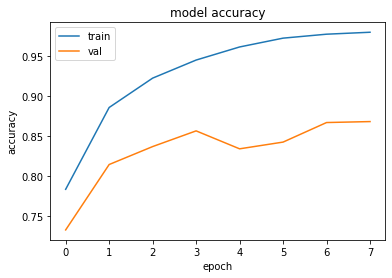

In [ ]:
import keras
from matplotlib import pyplot as plt

history=model.fit(x=train_batches,
              steps_per_epoch=len(train_batches),
              validation_data=valid_batches,
              validation_steps=len(valid_batches),
              epochs=8,
              verbose=2
)

model.save('/content/drive/MyDrive/model/classificationModelFinal')
print("model saved.")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

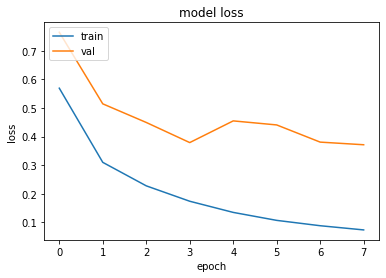

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#8 epochs
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
test_batches.class_indices
cm_plot_labels = ['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


Confusion matrix, without normalization
[[424  42  20  13   1]
 [136 343  12   8   1]
 [ 40  20 390  50   0]
 [  5   1  10 484   0]
 [  0   0   2   1 497]]


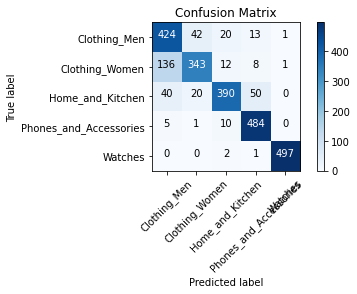

In [ ]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
test_batches.class_indices
cm_plot_labels = ['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


# Content based image retrieval 

In [ ]:
import requests
import os
import numpy as np
from numpy.linalg import norm
import joblib as pickle
from tqdm import tqdm
import os
import PIL
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
#from tensorflow.keras.applications.MobileNet import MobileNetV2,preprocess_input
#from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size =342
 
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(img_size, img_size, 3),pooling='max')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 342, 342, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 348, 348, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 171, 171, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 171, 171, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
batch_size = 200
#root_dir = '101_ObjectCategories'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# read data
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

train_path = '/content/drive/MyDrive/data/train/'
valid_path = '/content/drive/MyDrive/data/valid'
test_path = '/content/drive/MyDrive/data/test/'

#x_train = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
 #   directory=train_path, target_size=(342,342), batch_size=10)
#valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
 #   directory=valid_path, target_size=(342,342), batch_size=10)
#x_test = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
 #   directory=test_path, target_size=(342,342), batch_size=10, shuffle=False)

#feature_list = model.predict_generator(x_train)


img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        classes= ['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches'],
                                        shuffle=False)

num_epochs = int(math.ceil(20083 / batch_size))
#####################################"""""
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        classes=['Clothing_Men'],
                                        shuffle=False)

num_epochs = int(math.ceil(1188 / batch_size))

feature_list_clothing_men = model.predict_generator(datagen, num_epochs)
np.save("/content/drive/MyDrive/feature_list/Clothing_Men_binary.npy", feature_list)

#######################################
#####################################"""""
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        classes=['Clothing_Women'],
                                        shuffle=False)

#num_images = len(datagen.filenames)
num_epochs = int(math.ceil(1188 / batch_size))

feature_list_clothing_men = model.predict_generator(datagen, 10)
np.save("/content/drive/MyDrive/feature_list/Clothing_Women_binary.npy", feature_list)

#######################################
#####################################"""""
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        classes=['Home_and_Kitchen'],
                                        shuffle=False)

#num_images = len(datagen.filenames)
num_epochs = int(math.ceil(1188 / batch_size))

feature_list_clothing_men = model.predict_generator(datagen, 10)
np.save("/content/drive/MyDrive/feature_list/Home_and_Kitchen_binary.npy", feature_list)

#######################################
#####################################"""""
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        classes=['Phones_and_Accessories'],
                                        shuffle=False)

#num_images = len(datagen.filenames)
num_epochs = int(math.ceil(1188 / batch_size))

feature_list_clothing_men = model.predict_generator(datagen, 10)
np.save("/content/drive/MyDrive/feature_list/Phones_and_Accessories_binary.npy", feature_list)

#######################################
#####################################"""""
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        classes=['Watches'],
                                        shuffle=False)

#num_images = len(datagen.filenames)
num_epochs = int(math.ceil(1188 / batch_size))

feature_list_clothing_men = model.predict_generator(datagen, 10)
np.save("/content/drive/MyDrive/feature_list/Watches_binary.npy", feature_list)

#######################################

Found 20083 images belonging to 5 classes.


In [ ]:
train_path='/content/drive/MyDrive/data/train'

img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=50,
                                        classes=['Phones_and_Accessories'],
                                        shuffle=False)

#num_images = len(datagen.filenames)

feature_list_clothing_men = model.predict_generator(datagen, 10)
np.save("/content/drive/MyDrive/feature_list/Phones_and_AccessoriesBinary.npy", feature_list_clothing_men)

Found 4010 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
feature_list = model.predict(datagen, num_epochs)


In [ ]:
np.save("/content/drive/MyDrive/data/feature_list_binary.npy", feature_list)

feature = np.load("/content/drive/MyDrive/data/feature_list_binary.npy")



In [ ]:
filenames = [train_path + '/' + s for s in datagen.filenames]

In [ ]:
array_rain_fall_npy = np.load("/content/drive/MyDrive/data/Clothing_Women_binary.npy")

print("NumPy array: \n", array_rain_fall_npy)
print("Shape: ", array_rain_fall_npy.shape)
print("Data Type: ", array_rain_fall_npy.dtype.name)
type(array_rain_fall_npy)

FileNotFoundError: ignored

In [ ]:
neighbors = NearestNeighbors(n_neighbors=8,
                             algorithm='ball_tree',
                             metric='euclidean')
array_rain_fall_npy = np.load("/content/drive/MyDrive/data/feature_list_binary.npy")

neighbors.fit(array_rain_fall_npy)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius=1.0)

In [ ]:
img_path = '/content/drive/MyDrive/data/test/Clothing_Men/B00039NKXC_31BBogcWz6L._SX342_.jpg'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
test_img_features = model.predict(preprocessed_img, batch_size=1)

_, indices = neighbors.kneighbors(test_img_features)

In [ ]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

(1, 8)


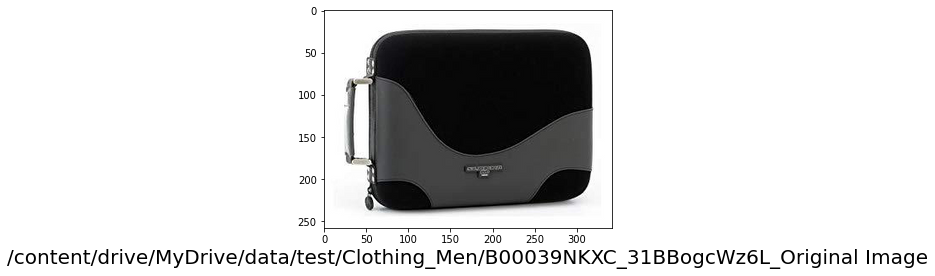

********* Predictions ***********


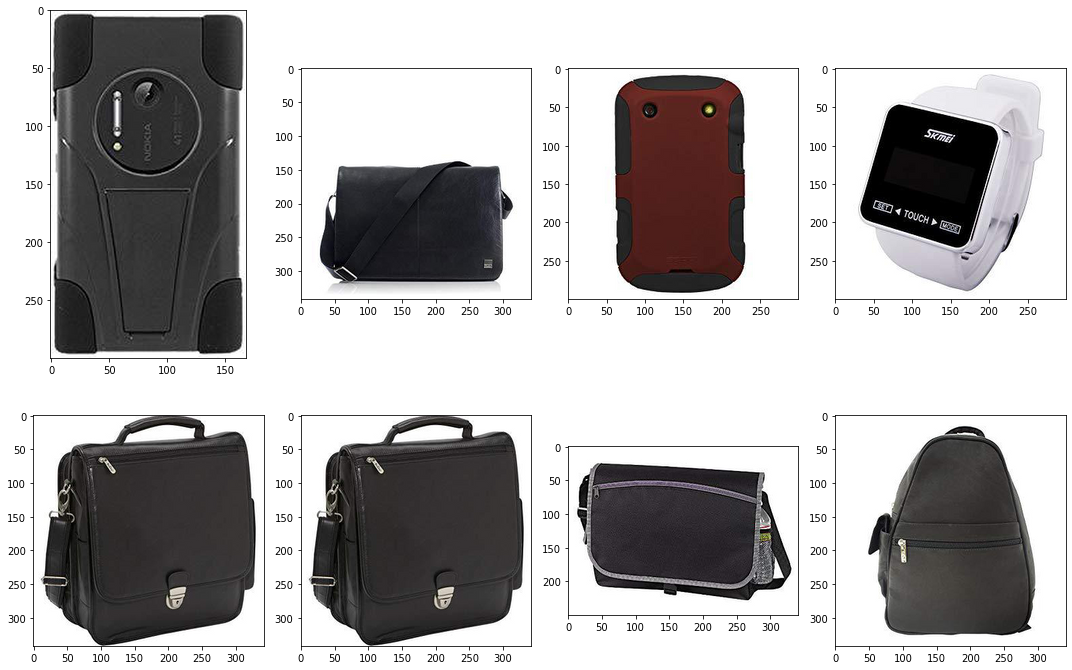

In [ ]:
print(indices.shape)

plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])

In [ ]:
pca = PCA(n_components=100)
pca.fit(feature_list)
compressed_features = pca.transform(feature_list)

In [ ]:
neighbors_pca_features = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree', metric='euclidean')
neighbors_pca_features.fit(compressed_features)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)
print(indices.shape)
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])

# CBIR final

Found 4010 images belonging to 1 classes.
(1, 8)


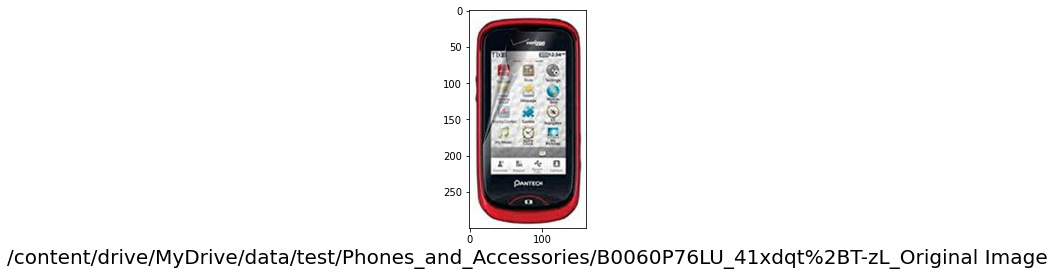

********* Predictions ***********


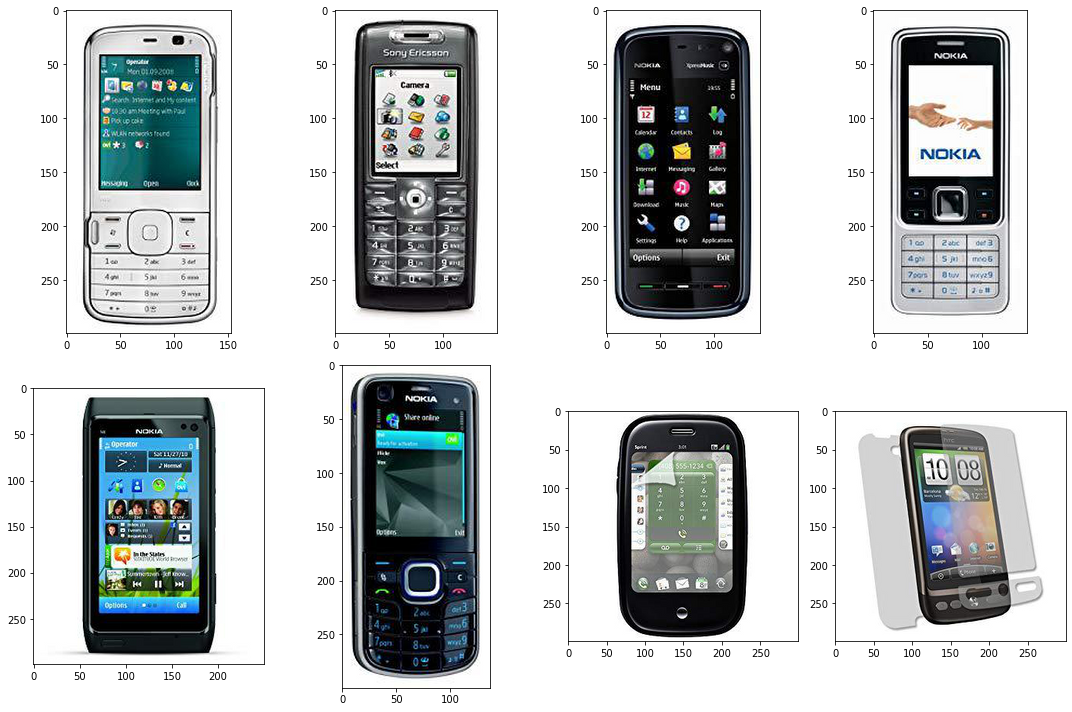

In [ ]:
path='/content/drive/MyDrive/data/train'
#filenames = [path + '/' + s for s in datagen.filenames]
#type(filenames)
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

def CBIR(categorie, img_path):
  classe="Watches"
  train_path="/content/drive/MyDrive/data/train"
  img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
  datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=100,
                                        #classes=['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches'],
                                        classes=[categorie],
                                        shuffle=False)
  filenames = [train_path + '/' + s for s in datagen.filenames]
  type(filenames)
  feature_path='/content/drive/MyDrive/feature_list/'+categorie+'_binary.npy'
  array_rain_fall_npy = np.load(feature_path)
  neighbors = NearestNeighbors(n_neighbors=8,
                             algorithm='ball_tree',
                             metric='euclidean')
  neighbors.fit(array_rain_fall_npy)
  path='/content/drive/MyDrive/data/train'
  filenames = [path + '/' + s for s in datagen.filenames]
  #img_path = '/content/drive/MyDrive/data/test/Clothing_Men/B00039NKXC_31BBogcWz6L._SX342_.jpg'
  input_shape = (img_size, img_size, 3)
  img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
  img_array = image.img_to_array(img)
  expanded_img_array = np.expand_dims(img_array, axis=0)
  preprocessed_img = preprocess_input(expanded_img_array)
  test_img_features = model.predict(preprocessed_img, batch_size=1)

  _, indices = neighbors.kneighbors(test_img_features)
  print(indices.shape)

  plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
  plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
  plt.show()
  print('********* Predictions ***********')
  #similar_images(indices[0])
  plt.figure(figsize=(15,10), facecolor='white')
  plotnumber = 1  
  indices=indices[0]
  for index in indices:
      if plotnumber<=len(indices) :
          ax = plt.subplot(2,4,plotnumber)
          plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
          plotnumber+=1
  plt.tight_layout()

#img_path = '/content/drive/MyDrive/data/test/Watches/B001397CVW_41BWOTACuIL._SY300_.jpg'
#img_path="/content/drive/MyDrive/data/test/Clothing_Men/B0015VAYMC_41nfspjmQ4L._SX342_.jpg"
#img_path="/content/drive/MyDrive/data/test/Clothing_Men/B009TGTALG_41C64kjdeAL._SX342.jpg"_
#img_path='/content/drive/MyDrive/data/test/Home_and_Kitchen/B0041I1B5U_31CbCreNJHL._SY300_.jpg'
img_path='/content/drive/MyDrive/data/test/Phones_and_Accessories/B0060P76LU_41xdqt%2BT-zL._SY300_.jpg'
#img_path='/content/drive/MyDrive/data/test/Watches/B0073O0IW6_41rsc1kWDVL._SY300_.jpg'
CBIR(categorie = "Phones_and_Accessories", img_path = img_path)

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
classe="Watches"
train_path="/content/drive/MyDrive/data/train"
datagen = img_gen.flow_from_directory(train_path,
                                        target_size=(img_size, img_size),
                                        batch_size=100,
                                        #classes=['Clothing_Men', 'Clothing_Women', 'Home_and_Kitchen', 'Phones_and_Accessories', 'Watches'],
                                        classes=[classe],
                                        shuffle=False)
type(filenames)

Found 4010 images belonging to 1 classes.


list

# Recommandation

In [ ]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
imgs_path = "/content/drive/MyDrive/data/train/Watches/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 8 # number of most similar images to retrieve

In [ ]:
# load the model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
img_size=224
feat_extractor = ResNet50(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')

# remove the last layers in order to get features instead of predictions
#feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
imgs_path='/content/drive/MyDrive/data/train/'
file1 = ["/content/drive/MyDrive/data/valid/Clothing_Men/" + x for x in os.listdir("/content/drive/MyDrive/data/valid/Clothing_Men") if "jpg" in x]
file2=["/content/drive/MyDrive/data/valid/Clothing_Women/" + x for x in os.listdir("/content/drive/MyDrive/data/valid/Clothing_Women") if "jpg" in x]
file3 = ["/content/drive/MyDrive/data/valid/Home_and_Kitchen/" + x for x in os.listdir("/content/drive/MyDrive/data/valid/Home_and_Kitchen") if "jpg" in x]
file4=["/content/drive/MyDrive/data/valid/Phones_and_Accessories/" + x for x in os.listdir("/content/drive/MyDrive/data/valid/Phones_and_Accessories") if "jpg" in x]
file5=["/content/drive/MyDrive/data/valid/Watches/" + x for x in os.listdir("/content/drive/MyDrive/data/valid/Watches") if "jpg" in x]
files=np.concatenate((file1, file2, file3, file4, file5), axis=0)
print(files)
print("number of images:",len(files))

['/content/drive/MyDrive/data/valid/Clothing_Men/B00086HRXE_416NDF4XtKL._SX342_.jpg'
 '/content/drive/MyDrive/data/valid/Clothing_Men/B00411EWO4_412ybtcFdVL._SX342_.jpg'
 '/content/drive/MyDrive/data/valid/Clothing_Men/B0090OIMUW_419YXkWi5YL._SX342_.jpg'
 ...
 '/content/drive/MyDrive/data/valid/Watches/B0058RJ6NW_51WRxkzLKXL._SY300_.jpg'
 '/content/drive/MyDrive/data/valid/Watches/B0051DA95C_51rLd5tFCvL._SY300_.jpg'
 '/content/drive/MyDrive/data/valid/Watches/B0057Q42KG_41GiXs%2BJk0L._SY300_.jpg']
number of images: 2500


In [ ]:
# load all the images and prepare them for feeding into the CNN

importedImages = []
i=0
for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    print(i)
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    i=i+1
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())
np.save("/content/drive/MyDrive/processed_imgsTOT.npy", processed_imgs)


In [ ]:
# extract the images features
processed_imgs = np.load("/content/drive/MyDrive/processed_imgsTOT.npy")

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape
np.save("/content/drive/MyDrive/imgs_featuresTOT.npy", imgs_features)



features successfully extracted!


In [ ]:
imgs_features=np.load("/content/drive/MyDrive/recommendation/imgs_featuresTOT.npy" )


In [ ]:
# compute cosine similarities between images
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
cosSimilarities = cosine_similarity(imgs_features)
type(cosSimilarities)
# store the results into a pandas dataframe
print(len(imgs_features))
print(len(imgs_features))
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

NameError: ignored

-----------------------------------------------------------------------
original product:


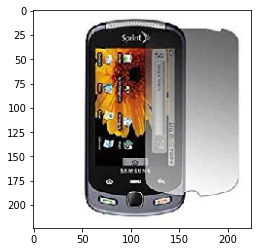

-----------------------------------------------------------------------
most similar products:


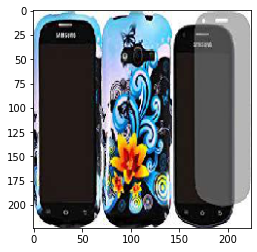

similarity score :  0.7985951


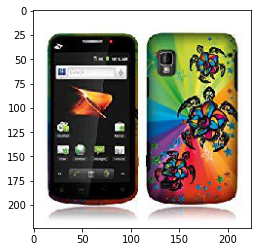

similarity score :  0.77920574


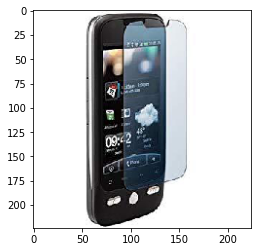

similarity score :  0.7773913


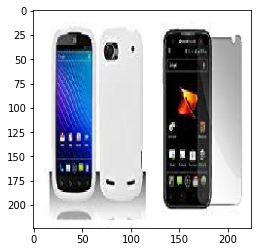

similarity score :  0.76140016


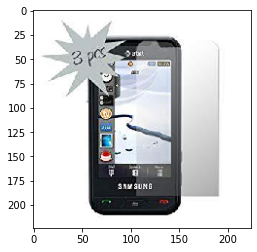

similarity score :  0.75994503


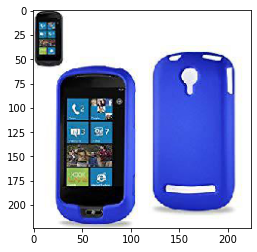

similarity score :  0.75809276


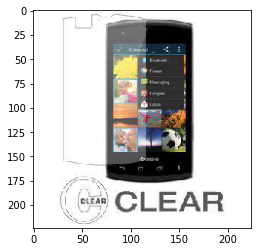

similarity score :  0.7576889


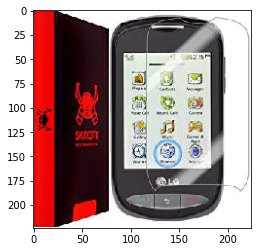

similarity score :  0.75505716


In [ ]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i]) 
# 2400 / 200 / 800 / 1900 / 1070
retrieve_most_similar_products(files[1900])
#retrieve_most_similar_products(files[55])

# recomendation using vgg16 

In [ ]:
# load the model
from keras.applications import vgg16
from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
img_size=224
feat_extractor = VGG16(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')

# print the layers of the CNN
feat_extractor.summary()

In [ ]:
processed_imgs = np.load("/content/drive/MyDrive/processed_imgsTOT.npy")

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape
np.save("/content/drive/MyDrive/recommendation/imgs_featuresvgg16.npy", imgs_features)


features successfully extracted!


In [ ]:
imgs_featuresvgg = np.load("/content/drive/MyDrive/recommendation/imgs_featuresvgg16.npy")
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
cosSimilaritiesvgg = cosine_similarity(imgs_featuresvgg)
type(cosSimilaritiesvgg)
# store the results into a pandas dataframe
print(len(imgs_featuresvgg))
cos_similarities_df_vgg = pd.DataFrame(cosSimilaritiesvgg, columns=files, index=files)
cos_similarities_df_vgg.head()

2500


,/content/drive/MyDrive/data/valid/Clothing_Men/B00086HRXE_416NDF4XtKL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00411EWO4_412ybtcFdVL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0090OIMUW_419YXkWi5YL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00282XZTG_518HCBzl%2BBL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0097ZGFM6_41cSgb3bPdL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0071FJSUK_31VW17I9FrL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B008159AH0_51addxjHLDL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00540G2JO_31merM3VgAL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00099YXEQ_31vOvs0u5ZL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0077V90H4_41BgHhnEfZL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00267AVPE_41irrGjxtqL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B007038TOO_41%2B7gCfOcKL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00155MUUW_41coZsJJKWL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00752LKJQ_41%2BCzXQ1tNL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0077CLFFI_31e9qcxOdvL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B006563RRQ_31lFBT32QzL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00479TIE4_31Q0DyzCPUL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00460HPIA_41As5v96GKL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0085EF8Y6_51G-NmXvy6L._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B000632R1Q_41u0n77bfxL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00455X472_51f2kMKD8-L._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0069U5EF6_41NtKVSiOAL.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B005441QAU_51cwDfm1wCL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0099PKQ2E_411NAooL1eL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0089IFNU2_51qKc7XBOPL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00274UH78_41mAijfqalL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0080Y2JYS_41ZpTq9k0mL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0091K71HA_41iMh6qnPNL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0089G8HAW_41VSb2b44EL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0087660M6_41ugzlk%2BaIL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0027542YG_41NGcRYewrL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0077BZAA0_41q-YeRdGIL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0065VOMQQ_41s4SOuXkIL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0089ZNUR8_31ufcZ7219L._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0087JCCCU_51DUyAiWIYL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0084QP3BI_318Zx3D2A%2BL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0069D5I54_41x95iUfllL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0087DWAGY_412IZ21CUWL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0074C4QR0_41Lt2NFUirL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00844K5E0_410HUaV5VIL._SX342_.jpg,...,/content/drive/MyDrive/data/valid/Watches/B0049DZND8_512GubycH6L._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0068OS6US_51oI5RfLzuL._SX300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0048WO45S_41ZpTQfksrL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0049TR4K2_51Gg6Ls3bJL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B009VSW01Y_51aV0YBVRTL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B009RKHWEG_51rnVBFipbL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0048MJ7GE_51aTd-yhu0L._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0019RMH4U_41emSSutWvL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B009YSJQOK_410p%2BI1ZM%2BL._SY300_.jpg,/content/drive/M

-----------------------------------------------------------------------
original product:


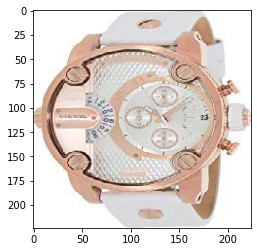

-----------------------------------------------------------------------
most similar products:


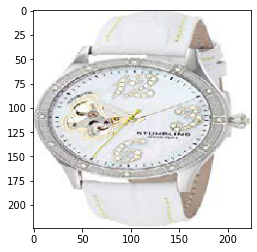

similarity score :  0.8159009


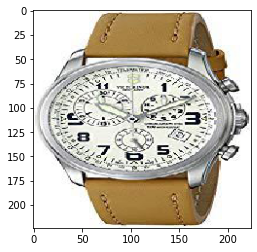

similarity score :  0.80338883


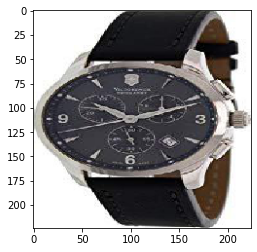

similarity score :  0.7972535


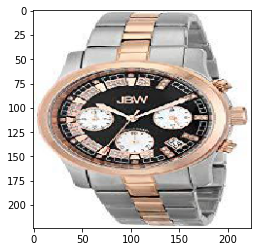

similarity score :  0.7915418


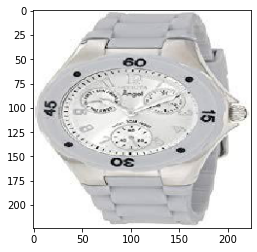

similarity score :  0.7889648


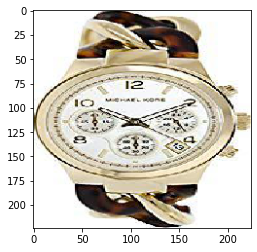

similarity score :  0.7841444


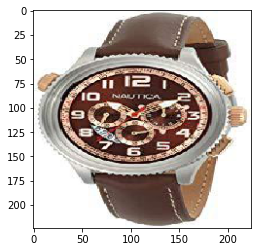

similarity score :  0.7839917


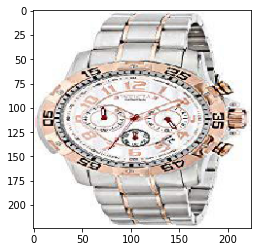

similarity score :  0.78366524


In [ ]:
def retrieve_most_similar_products_vgg(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df_vgg[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df_vgg[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])
# 2400 / 200 / 800 / 1900 / 1070
retrieve_most_similar_products_vgg(files[2400])
#retrieve_most_similar_products_vgg(files[55])

# recommendation using inception net

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
img_size=224
feat_extractor_InceptionV3 = InceptionV3(weights='imagenet', 
                                         include_top=False,
                                         input_shape=(img_size,img_size, 3),
                                         pooling='max')

# print the layers of the CNN
feat_extractor_InceptionV3.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [ ]:
processed_imgs = np.load("/content/drive/MyDrive/processed_imgsTOT.npy")

imgs_features = feat_extractor_InceptionV3.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape
np.save("/content/drive/MyDrive/recommendation/imgs_featuresInceptionV3.npy", imgs_features)

features successfully extracted!


In [ ]:
imgs_features_InceptionV3 = np.load("/content/drive/MyDrive/recommendation/imgs_featuresInceptionV3.npy")
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
cosSimilarities_InceptionV3 = cosine_similarity(imgs_features_InceptionV3)

# store the results into a pandas dataframe
print(len(imgs_features_InceptionV3))
cos_similarities_df_InceptionV3 = pd.DataFrame(cosSimilarities_InceptionV3, columns=files, index=files)
cos_similarities_df_InceptionV3.head()

2500


,/content/drive/MyDrive/data/valid/Clothing_Men/B00086HRXE_416NDF4XtKL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00411EWO4_412ybtcFdVL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0090OIMUW_419YXkWi5YL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00282XZTG_518HCBzl%2BBL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0097ZGFM6_41cSgb3bPdL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0071FJSUK_31VW17I9FrL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B008159AH0_51addxjHLDL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00540G2JO_31merM3VgAL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00099YXEQ_31vOvs0u5ZL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0077V90H4_41BgHhnEfZL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00267AVPE_41irrGjxtqL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B007038TOO_41%2B7gCfOcKL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00155MUUW_41coZsJJKWL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00752LKJQ_41%2BCzXQ1tNL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0077CLFFI_31e9qcxOdvL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B006563RRQ_31lFBT32QzL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00479TIE4_31Q0DyzCPUL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00460HPIA_41As5v96GKL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0085EF8Y6_51G-NmXvy6L._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B000632R1Q_41u0n77bfxL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00455X472_51f2kMKD8-L._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0069U5EF6_41NtKVSiOAL.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B005441QAU_51cwDfm1wCL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0099PKQ2E_411NAooL1eL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0089IFNU2_51qKc7XBOPL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00274UH78_41mAijfqalL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0080Y2JYS_41ZpTq9k0mL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0091K71HA_41iMh6qnPNL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0089G8HAW_41VSb2b44EL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0087660M6_41ugzlk%2BaIL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0027542YG_41NGcRYewrL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0077BZAA0_41q-YeRdGIL._SY445_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0065VOMQQ_41s4SOuXkIL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0089ZNUR8_31ufcZ7219L._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0087JCCCU_51DUyAiWIYL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0084QP3BI_318Zx3D2A%2BL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0069D5I54_41x95iUfllL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0087DWAGY_412IZ21CUWL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B0074C4QR0_41Lt2NFUirL._SX342_.jpg,/content/drive/MyDrive/data/valid/Clothing_Men/B00844K5E0_410HUaV5VIL._SX342_.jpg,...,/content/drive/MyDrive/data/valid/Watches/B0049DZND8_512GubycH6L._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0068OS6US_51oI5RfLzuL._SX300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0048WO45S_41ZpTQfksrL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0049TR4K2_51Gg6Ls3bJL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B009VSW01Y_51aV0YBVRTL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B009RKHWEG_51rnVBFipbL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0048MJ7GE_51aTd-yhu0L._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B0019RMH4U_41emSSutWvL._SY300_.jpg,/content/drive/MyDrive/data/valid/Watches/B009YSJQOK_410p%2BI1ZM%2BL._SY300_.jpg,/content/drive/M

-----------------------------------------------------------------------
original product:


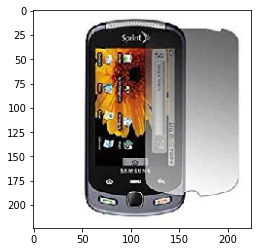

-----------------------------------------------------------------------
most similar products:


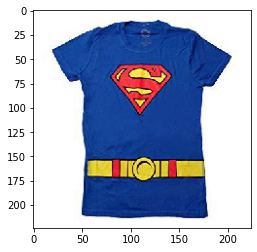

similarity score :  0.8786864


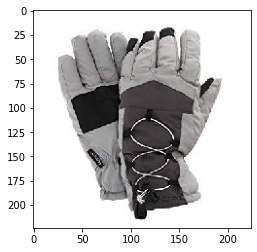

similarity score :  0.8699106


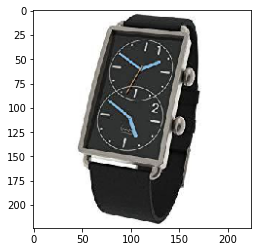

similarity score :  0.86066824


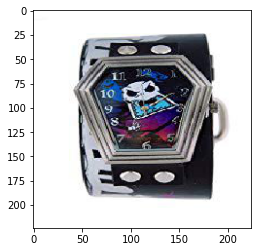

similarity score :  0.8581985


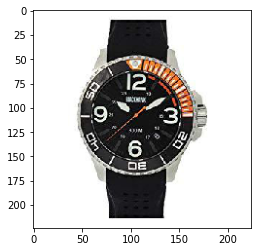

similarity score :  0.85757565


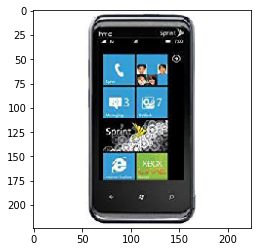

similarity score :  0.8562845


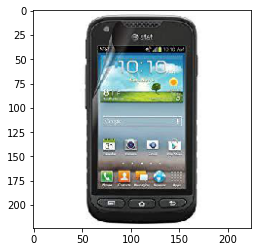

similarity score :  0.8544978


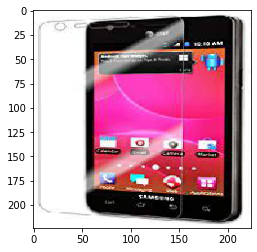

similarity score :  0.8537977


In [ ]:
def retrieve_most_similar_products_inceptionv3(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df_InceptionV3[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df_InceptionV3[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])
# 2400 / 200 / 800 / 1900 / 1070
retrieve_most_similar_products_inceptionv3(files[1900])
#retrieve_most_similar_products_inceptionv3(files[55])